In [148]:
import quandl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

import os
quandl.ApiConfig.api_key = 'fxZzuDxTUwi4x7ZqE2zY'

from pandas.tseries.offsets import DateOffset
from datetime import datetime


from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

In [165]:
# Reading CSV

Skip_country = ['China','Croatia','Indonesia','Indonesia','Israel','Israel','Kenya','Sri Lanka','Malaysia','Nigeria','Netherlands',
    'Philippines','Russia','Tanzania','United Kingdom','Uruguay','Italy','Mexico','Paraguay','Thailand','Ukraine','Serbia','United States','Venezuela']
df_economicindicators = pd.read_csv('Series.csv')
df_economicindicators1 = df_economicindicators[~df_economicindicators['country'].isin(Skip_country)]

In [166]:
df_economicindicators1

,country_code,country,gdp_per_capita,gdp_per_capita_from_date,gdp_per_capita_to_date,labor_force_participation_rate,labor_force_participation_rate_from_date,labor_force_participation_rate_to_date,imports,imports_from_date,...,inflation_rate_to_date,interest_rate,interest_rate_from_date,interest_rate_to_date,unemployment_rate,unemployment_from_date,unemployment_to_date,population,population_from_date,population_to_date
0,AU,Australia,1998,1960-01-01,2019-01-01,2075,1961-01-01,2019-01-01,2039,1960-01-01,...,2019-01-01,2066,1961-01-01,2019-01-01,2066,1961-01-01,2019-01-01,2118,1960-01-01,2019-01-01
1,AZ,Azerbaijan,2548,1990-01-01,2017-01-01,2596,1989-01-01,2018-01-01,2573,1992-01-01,...,2019-01-01,2591,1998-01-01,2019-01-01,2591,1998-01-01,2019-01-01,2624,1926-01-01,2017-01-01
2,BA,Bosnia and Herzegovina,4830,1994-01-01,2019-01-01,4866,2006-01-01,2019-01-01,4849,1992-01-01,...,2019-01-01,4863,1998-01-01,2019-01-01,4863,1998-01-01,2019-01-01,4887,1960-01-01,2019-01-01
3,BD,Bangladesh,3092,1989-07-01,2018-07-01,3143,1999-07-01,2012-07-01,3120,1972-01-01,...,2019-01-01,3137,1976-01-01,2019-01-01,3137,1976-01-01,2019-01-01,3166,1960-01-01,2019-01-01
4,BG,Bulgaria,5859,1980-01-01,2019-01-01,5923,1965-01-01,2019-01-01,5893,1960-01-01,...,2019-01-01,5915,1992-01-01,2019-01-01,5915,1992-01-01,2019-01-01,5953,1990-01-01,2019-01-01
5,BR,Brazil,5333,1990-01-01,2012-01-01,5402,1960-01-01,2019-01-01,5371,1960-01-01,...,2019-01-01,5396,1997-01-01,2019-01-01,5396,1997-01-01,2019-01-01,5435,1960-01-01,2019-01-01
6,BY,Belarus,3497,1995-01-01,2017-01-01,3551,1970-01-01,2018-01-01,3530,1992-01-01,...,2019-01-01,3545,1992-01-01,2019-01-01,3545,1992-01-01,2019-01-01,3581,1991-01-01,2017-01-01
7,CA,Canada,6998,1960-01-01,2019-01-01,7057,1961-01-01,2019-01-01,7027,1960-01-01,...,2019-01-01,7051,1961-01-01,2017-01-01,7051,1961-01-01,2017-01-01,7081,1960-01-01,2019-01-01
8,CD,"Congo, Dem Rep",9107,2003-01-01,2019-01-01,9157,1990-01-01,2025-01-01,9138,1995-01-01,...,2016-01-01,9152,2006-01-01,2019-01-01,9152,2006-01-01,2019-01-01,9181,1950-01-01,2025-01-01
9,CH,Switzerland,39945,1960-01-01,2019-01-01,40004,1960-01-01,2019-01-01,39976,1960-01-01,...,2019-01-01,39997,2008-01-01,2019-01-01,39997,2008-01-01,2019-01-01,40037,1970-01-01,2018-01-01


In [167]:
DFN = ['gdp_per_capita',
'labor_force_participation_rate',
'imports',
'exports',
'capital_flows',
'remittances',
'tourism_revenue',
'electricity_production',
'steel_production',
'corporate_tax_rate',
'inflation_rate',
'interest_rate',
'unemployment_rate',
'population']


# DFN = ['df_' + N for N in DataFrameName]
# DFN

In [172]:

result1=pd.DataFrame()
#column_length = len(df_economicindicators.columns)
for index,row in df_economicindicators1.iterrows():
    lst_dates = []
    Series = 2
    From_Date = 3
    To_Date = 4
    list_of_dfs = {}
    for x in range(14):
        if x == 4:
            Series +=3
            From_Date +=3
            To_Date +=3
        start_date  = str(row[From_Date])
        end_date = str(row[To_Date])
        #print(f" Series : {x, Series, row[Series] , start_date}")
        start = datetime.strptime(start_date, "%Y-%m-%d")
        lst_dates.append(start_date)
        stop = datetime.strptime(end_date, "%Y-%m-%d")
        while start < stop:
            start = start + relativedelta(months = +12)
            lst_dates.append(start.strftime("%Y-%m-%d"))
        dateparam = " ,".join(lst_dates)
        df = pd.DataFrame()
        list_of_dfs[x] = df.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row[Series]))
        list_of_dfs[x].rename(columns={'value':DFN[x]},inplace=True)
        if x == 0 :
            result = list_of_dfs[x][['country_code','date']]
        result = result.merge(list_of_dfs[x],on=['country_code','date'])
        #print(DFN[x],result.shape)
        #clearing all the Variables
        lst_dates = []
        Series +=3
        From_Date +=3
        To_Date +=3
        start_date =''
        end_date = ''
        start =''
        stop =''
        
    #print(result.shape)    
    result1 = result1.append(result[['gdp_per_capita','labor_force_participation_rate','imports','exports','capital_flows',
            'remittances','tourism_revenue','electricity_production','steel_production','corporate_tax_rate','inflation_rate','interest_rate','unemployment_rate',
            'population']])
    #print(result1.shape)
    X = result1.drop("gdp_per_capita", axis=1)
    y = result1["gdp_per_capita"]
    print(X.shape, y.shape)
    # Split the data using train_test_split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    from sklearn.preprocessing import StandardScaler
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    train_pred_Y = model.predict(X_train_scaled)
    r2 = r2_score(train_pred_Y, y_train)
    print(row[1], r2)
    result = pd.DataFrame()


(8, 13) (8,)
Australia 1.0
(8, 13) (8,)
Azerbaijan 1.0
(16, 13) (16,)
Bosnia and Herzegovina 1.0
(16, 13) (16,)
Bangladesh 1.0
(24, 13) (24,)
Bulgaria 0.9998899268104073
(28, 13) (28,)
Brazil 0.9995081795259375
(30, 13) (30,)
Belarus 0.9863838883951319
(38, 13) (38,)
Canada 0.9571794686614323
(38, 13) (38,)
Congo, Dem Rep 0.9571794686614323
(44, 13) (44,)
Switzerland 0.9423111901427338
(51, 13) (51,)
Chile 0.8688071651192577
(57, 13) (57,)
Colombia 0.9412519494529962
(65, 13) (65,)
Czech Republic 0.8481163493738788
(68, 13) (68,)
Algeria 0.7362923095278507
(76, 13) (76,)
Egypt 0.5122694765878099
(82, 13) (82,)
Guatemala 0.3678218929989261
(90, 13) (90,)
Hungary 0.4954707175380191
(90, 13) (90,)
India 0.4954707175380191
(90, 13) (90,)
Iran 0.4954707175380191
(96, 13) (96,)
Jordan 0.6421188937788619
(104, 13) (104,)
Japan 0.5913829800054814
(112, 13) (112,)
South Korea 0.6830449961581335
(112, 13) (112,)
Libya 0.6830449961581335
(115, 13) (115,)
Morocco 0.38524740082207753
(116, 13) (116

Feature: 0, Score: 0.04949
Feature: 1, Score: 0.05031
Feature: 2, Score: 0.06148
Feature: 3, Score: 0.12296
Feature: 4, Score: 0.08560
Feature: 5, Score: 0.00845
Feature: 6, Score: 0.04323
Feature: 7, Score: 0.47487
Feature: 8, Score: 0.04050
Feature: 9, Score: 0.00532
Feature: 10, Score: 0.00427
Feature: 11, Score: 0.00581
Feature: 12, Score: 0.04771


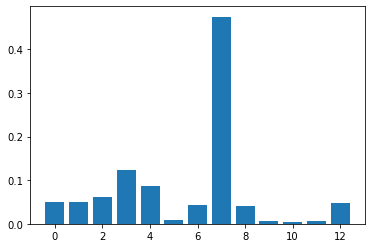

In [169]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [147]:
result1
# list_of_dfs[1]
#print(DataFrameName[0])
#df_gdp_per_capita
# 'df_labor_force_participation_rate'

""


In [20]:
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])
#pd.to_datetime(df['dates'], format='%Y%m%d')
lst_dates = []
for index,row in df_economicindicators[0:1].iterrows():
    print(row['country'])
    start_date  = str(row.gdp_per_capita_from_date)
    end_date = str(row.gdp_per_capita_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    print(lst_dates)
    dateparam = " ,".join(lst_dates)
    df_gdp_per_capita = df_gdp_per_capita.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.gdp_per_capita))
    df_population = pd.DataFrame()

    lst_dates = []
    start_date  = str(row.population_from_date)
    end_date = str(row.population_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_population = df_population.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.population))
    
    df_remittances = pd.DataFrame()
    lst_dates = []
    start_date  = str(row.remittances_from_date)
    end_date = str(row.remittances_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_remittances = df_remittances.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.remittances))
    
    df_tourism_revenue = pd.DataFrame()
    lst_dates = []
    start_date  = str(row.tourism_revenue_from_date)
    end_date = str(row.tourism_revenue_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_tourism_revenue = df_tourism_revenue.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.tourism_revenue))
    
    df_capital_flows = pd.DataFrame()
    lst_dates = []
    start_date  = str(row.capital_flows_from_date)
    end_date = str(row.capital_flows_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_capital_flows = df_capital_flows.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.capital_flows))
 
    df_exports = pd.DataFrame()
    lst_dates = []
    start_date  = str(row.exports_from_date)
    end_date = str(row.exports_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_exports = df_exports.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.exports))
    
    df_imports = pd.DataFrame()
    lst_dates = []
    start_date  = str(row.imports_from_date)
    end_date = str(row.imports_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_imports = df_imports.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.imports))

    df_electricity_production = pd.DataFrame()
    lst_dates = []
    start_date  = str(row.electricity_production_from_date)
    end_date = str(row.electricity_production_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_electricity_production = df_electricity_production.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.electricity_production))
    
    df_steel_production = pd.DataFrame()

    lst_dates = []
    start_date  = str(row.steel_production_from_date)
    end_date = str(row.steel_production_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_steel_production = df_steel_production.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.steel_production))
    
    df_corporate_tax_rate = pd.DataFrame()
    lst_dates = []
    start_date  = str(row.corporate_tax_rate_from_date)
    end_date = str(row.corporate_tax_rate_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_corporate_tax_rate = df_corporate_tax_rate.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.corporate_tax_rate))
 


    


 


KeyError: 'country'

# GDP Per Capita

In [ ]:
quandl.get_table('EDIA/ECD', date='2019-09-01,2019-08-01,2019-07-01', series_id='')

In [ ]:
df_economicindicators['Dates']

In [16]:
df_gdp_per_capita = pd.DataFrame()
# df_GDP_Growth = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for 
start = df_economicindicators['gdp_per_capita_from_date'].apply( lambda x: datetime.strptime(x, "%Y-%m-%d"))
end = df_economicindicators['gdp_per_capita_from_date'].apply( lambda x: datetime.strptime(x, "%Y-%m-%d"))
lst_dates = 
while start < stop:
    start = start + relativedelta(months = +12)
    lst_dates.append(start.strftime("%Y-%m-%d"))


# for row in df_economicindicators.itertuples():
#     start_date  = str(row.gdp_per_capita_from_date)
#     end_date = str(row.gdp_per_capita_to_date)
#     start = datetime.strptime(start_date, "%Y-%m-%d")
#     lst_dates.append(start_date)
#     stop = datetime.strptime(end_date, "%Y-%m-%d")
#     while start < stop:
#         start = start + relativedelta(months = +12)
#         lst_dates.append(start.strftime("%Y-%m-%d"))
#     lst_dates.append
#     dateparam = " ,".join(lst_dates)
#     df_gdp_per_capita = df_gdp_per_capita.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.gdp_per_capita))
#     lst_dates = []
# df_gdp_per_capita

0    1960-01-01
1    1990-01-01
2    1994-01-01
3    1989-07-01
4    1980-01-01
        ...    
56   1960-01-01
57   1997-01-01
58   1960-01-01
59   1960-01-01
60   1960-01-01
Name: gdp_per_capita_from_date, Length: 61, dtype: datetime64[ns]

In [7]:
df_gdp_per_capita.rename(columns={'value':'gdp_per_capita'},inplace=True)

In [8]:
df_gdp_per_capita

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,gdp_per_capita
None,,,,,,,,,
0,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2019-01-01,76771.0
1,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2018-01-01,74046.0
2,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2017-01-01,71687.0
3,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2016-01-01,68650.0
4,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2015-01-01,68215.0
...,...,...,...,...,...,...,...,...,...
55,37664,ZA,096,ZA.096.A.01,South Africa: GDP Per Capita [South Africa: GD...,LCU,A,1964-01-01,392.0
56,37664,ZA,096,ZA.096.A.01,South Africa: GDP Per Capita [South Africa: GD...,LCU,A,1963-01-01,365.0
57,37664,ZA,096,ZA.096.A.01,South Africa: GDP Per Capita [South Africa: GD...,LCU,A,1962-01-01,338.0


In [9]:
# df_gdp_per_capita.to_csv("GDP_Per_Capita.csv")

# Population

In [43]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_population = pd.DataFrame()
# df_GDP_Growth = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.population_from_date)
    end_date = str(row.population_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_population = df_population.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.population))
    lst_dates = []
df_population

<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.dat

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2019-01-01,25364.0
1,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2018-01-01,24983.0
2,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2017-01-01,24602.0
3,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2016-01-01,24191.0
4,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2015-01-01,23816.0
...,...,...,...,...,...,...,...,...,...
55,37778,ZA,171,ZA.171.A.01,South Africa: Population [South Africa: Popula...,'000 persons,A,1964-01-01,18896.0
56,37778,ZA,171,ZA.171.A.01,South Africa: Population [South Africa: Popula...,'000 persons,A,1963-01-01,18423.0
57,37778,ZA,171,ZA.171.A.01,South Africa: Population [South Africa: Popula...,'000 persons,A,1962-01-01,17966.0


In [11]:
df_population.rename(columns={'value':'population'},inplace=True)

In [12]:
df_population

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,population
None,,,,,,,,,
0,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2019-01-01,25364.0
1,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2018-01-01,24983.0
2,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2017-01-01,24602.0
3,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2016-01-01,24191.0
4,2118,AU,171,AU.171.A.01,Australia: Population [Australia: Population],'000 persons,A,2015-01-01,23816.0
...,...,...,...,...,...,...,...,...,...
55,37778,ZA,171,ZA.171.A.01,South Africa: Population [South Africa: Popula...,'000 persons,A,1964-01-01,18896.0
56,37778,ZA,171,ZA.171.A.01,South Africa: Population [South Africa: Popula...,'000 persons,A,1963-01-01,18423.0
57,37778,ZA,171,ZA.171.A.01,South Africa: Population [South Africa: Popula...,'000 persons,A,1962-01-01,17966.0


# Remittances

In [13]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_remittances = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.remittances_from_date)
    end_date = str(row.remittances_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_remittances = df_remittances.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.remittances))
    lst_dates = []
df_remittances

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2132,AU,179,AU.179.A.01,Australia: Remittances [Australia: BoP: Person...,Millions US$,A,2019-01-01,1727.0
1,2132,AU,179,AU.179.A.01,Australia: Remittances [Australia: BoP: Person...,Millions US$,A,2018-01-01,1861.0
2,2132,AU,179,AU.179.A.01,Australia: Remittances [Australia: BoP: Person...,Millions US$,A,2017-01-01,2002.0
3,2132,AU,179,AU.179.A.01,Australia: Remittances [Australia: BoP: Person...,Millions US$,A,2016-01-01,2057.0
4,2132,AU,179,AU.179.A.01,Australia: Remittances [Australia: BoP: Person...,Millions US$,A,2015-01-01,2175.0
...,...,...,...,...,...,...,...,...,...
45,37793,ZA,179,ZA.179.A.01,South Africa: Remittances [South Africa: BoP: ...,Millions US$,A,1974-01-01,26.0
46,37793,ZA,179,ZA.179.A.01,South Africa: Remittances [South Africa: BoP: ...,Millions US$,A,1973-01-01,16.0
47,37793,ZA,179,ZA.179.A.01,South Africa: Remittances [South Africa: BoP: ...,Millions US$,A,1972-01-01,17.0


In [14]:
df_remittances.rename(columns={'value':'remittances'},inplace=True)

In [15]:
# df_gdp_from_manufacturing.to_csv("GDP_From_Manufacturing.csv")

# Tourism Revenue

In [16]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_tourism_revenue = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.tourism_revenue_from_date)
    end_date = str(row.tourism_revenue_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_tourism_revenue = df_tourism_revenue.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.tourism_revenue))
    lst_dates = []
df_tourism_revenue

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2158,AU,196,AU.196.A.01,Australia: Tourism Revenues [Australia: Intern...,Millions US$,A,2018-01-01,47327.0
1,2158,AU,196,AU.196.A.01,Australia: Tourism Revenues [Australia: Intern...,Millions US$,A,2017-01-01,43975.0
2,2158,AU,196,AU.196.A.01,Australia: Tourism Revenues [Australia: Intern...,Millions US$,A,2016-01-01,39059.0
3,2158,AU,196,AU.196.A.01,Australia: Tourism Revenues [Australia: Intern...,Millions US$,A,2015-01-01,36249.0
4,2158,AU,196,AU.196.A.01,Australia: Tourism Revenues [Australia: Intern...,Millions US$,A,2014-01-01,35736.0
...,...,...,...,...,...,...,...,...,...
19,37819,ZA,196,ZA.196.A.01,South Africa: Tourism Revenues [South Africa: ...,Millions US$,A,1999-01-01,3407.0
20,37819,ZA,196,ZA.196.A.01,South Africa: Tourism Revenues [South Africa: ...,Millions US$,A,1998-01-01,3419.0
21,37819,ZA,196,ZA.196.A.01,South Africa: Tourism Revenues [South Africa: ...,Millions US$,A,1997-01-01,3422.0


In [17]:
df_tourism_revenue.rename(columns={'value':'tourism_revenue'},inplace=True)

In [18]:
# df_gdp_from_services.to_csv("GDP_From_Services.csv")

# Capital Flows

In [19]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_capital_flows = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.capital_flows_from_date)
    end_date = str(row.capital_flows_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_capital_flows = df_capital_flows.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.capital_flows))
    lst_dates = []
df_capital_flows

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2019-01-01,-544.0
1,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2018-01-01,-361.0
2,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2017-01-01,-388.0
3,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2016-01-01,-607.0
4,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2015-01-01,-456.0
...,...,...,...,...,...,...,...,...,...
14,37505,ZA,012,ZA.012.A.01,South Africa: Capital Flows [South Africa: BoP...,Millions US$,A,2005-01-01,30.0
15,37505,ZA,012,ZA.012.A.01,South Africa: Capital Flows [South Africa: BoP...,Millions US$,A,2004-01-01,52.0
16,37505,ZA,012,ZA.012.A.01,South Africa: Capital Flows [South Africa: BoP...,Millions US$,A,2003-01-01,44.0


In [20]:
df_capital_flows.rename(columns={'value':'capital_flows'},inplace=True)

In [21]:
df_capital_flows

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,capital_flows
None,,,,,,,,,
0,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2019-01-01,-544.0
1,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2018-01-01,-361.0
2,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2017-01-01,-388.0
3,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2016-01-01,-607.0
4,1860,AU,012,AU.012.A.01,Australia: Capital Flows [Australia: BoP: Net ...,Millions US$,A,2015-01-01,-456.0
...,...,...,...,...,...,...,...,...,...
14,37505,ZA,012,ZA.012.A.01,South Africa: Capital Flows [South Africa: BoP...,Millions US$,A,2005-01-01,30.0
15,37505,ZA,012,ZA.012.A.01,South Africa: Capital Flows [South Africa: BoP...,Millions US$,A,2004-01-01,52.0
16,37505,ZA,012,ZA.012.A.01,South Africa: Capital Flows [South Africa: BoP...,Millions US$,A,2003-01-01,44.0


# Exports

In [22]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_exports = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.exports_from_date)
    end_date = str(row.exports_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_exports = df_exports.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.exports))
    lst_dates = []
df_exports

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2019-01-01,271592.0
1,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2018-01-01,257098.0
2,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2017-01-01,231131.0
3,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2016-01-01,192505.0
4,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2015-01-01,187684.0
...,...,...,...,...,...,...,...,...,...
55,37593,ZA,067,ZA.067.A.01,South Africa: Exports [South Africa: Merchandi...,Millions US$,A,1964-01-01,2479.0
56,37593,ZA,067,ZA.067.A.01,South Africa: Exports [South Africa: Merchandi...,Millions US$,A,1963-01-01,2359.0
57,37593,ZA,067,ZA.067.A.01,South Africa: Exports [South Africa: Merchandi...,Millions US$,A,1962-01-01,2219.0


In [23]:
df_exports.rename(columns={'value':'exports'},inplace=True)

In [24]:
df_exports

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,exports
None,,,,,,,,,
0,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2019-01-01,271592.0
1,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2018-01-01,257098.0
2,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2017-01-01,231131.0
3,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2016-01-01,192505.0
4,1934,AU,067,AU.067.A.01,Australia: Exports [Australia: Merchandise exp...,Millions US$,A,2015-01-01,187684.0
...,...,...,...,...,...,...,...,...,...
55,37593,ZA,067,ZA.067.A.01,South Africa: Exports [South Africa: Merchandi...,Millions US$,A,1964-01-01,2479.0
56,37593,ZA,067,ZA.067.A.01,South Africa: Exports [South Africa: Merchandi...,Millions US$,A,1963-01-01,2359.0
57,37593,ZA,067,ZA.067.A.01,South Africa: Exports [South Africa: Merchandi...,Millions US$,A,1962-01-01,2219.0


# Imports

In [25]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_imports = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.imports_from_date)
    end_date = str(row.imports_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_imports = df_imports.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.imports))
    lst_dates = []
df_imports

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2019-01-01,221569.0
1,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2018-01-01,235386.0
2,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2017-01-01,228780.0
3,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2016-01-01,196270.0
4,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2015-01-01,208501.0
...,...,...,...,...,...,...,...,...,...
55,37706,ZA,115,ZA.115.A.01,South Africa: Imports [South Africa: Merchandi...,Millions US$,A,1964-01-01,2281.0
56,37706,ZA,115,ZA.115.A.01,South Africa: Imports [South Africa: Merchandi...,Millions US$,A,1963-01-01,1771.0
57,37706,ZA,115,ZA.115.A.01,South Africa: Imports [South Africa: Merchandi...,Millions US$,A,1962-01-01,1476.0


In [26]:
df_imports

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2019-01-01,221569.0
1,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2018-01-01,235386.0
2,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2017-01-01,228780.0
3,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2016-01-01,196270.0
4,2039,AU,115,AU.115.A.01,Australia: Imports [Australia: Merchandise imp...,Millions US$,A,2015-01-01,208501.0
...,...,...,...,...,...,...,...,...,...
55,37706,ZA,115,ZA.115.A.01,South Africa: Imports [South Africa: Merchandi...,Millions US$,A,1964-01-01,2281.0
56,37706,ZA,115,ZA.115.A.01,South Africa: Imports [South Africa: Merchandi...,Millions US$,A,1963-01-01,1771.0
57,37706,ZA,115,ZA.115.A.01,South Africa: Imports [South Africa: Merchandi...,Millions US$,A,1962-01-01,1476.0


In [27]:
df_imports.rename(columns={'value':'imports'},inplace=True)

# Electricity Production

In [28]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_electricity_production = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.electricity_production_from_date)
    end_date = str(row.electricity_production_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_electricity_production = df_electricity_production.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.electricity_production))
    lst_dates = []
df_electricity_production

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2015-01-01,21044.0
1,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2014-01-01,18622.0
2,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2013-01-01,14939.0
3,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2012-01-01,12573.0
4,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2011-01-01,9718.0
...,...,...,...,...,...,...,...,...,...
40,37574,ZA,061,ZA.061.A.01,South Africa: Electricity Production [South Af...,Millions KWh,A,1975-01-01,0.0
41,37574,ZA,061,ZA.061.A.01,South Africa: Electricity Production [South Af...,Millions KWh,A,1974-01-01,0.0
42,37574,ZA,061,ZA.061.A.01,South Africa: Electricity Production [South Af...,Millions KWh,A,1973-01-01,0.0


In [29]:
df_electricity_production.rename(columns={'value':'electricity_production'},inplace=True)

In [30]:
df_electricity_production

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,electricity_production
None,,,,,,,,,
0,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2015-01-01,21044.0
1,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2014-01-01,18622.0
2,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2013-01-01,14939.0
3,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2012-01-01,12573.0
4,1918,AU,061,AU.061.A.01,Australia: Electricity Production [Australia: ...,Millions KWh,A,2011-01-01,9718.0
...,...,...,...,...,...,...,...,...,...
40,37574,ZA,061,ZA.061.A.01,South Africa: Electricity Production [South Af...,Millions KWh,A,1975-01-01,0.0
41,37574,ZA,061,ZA.061.A.01,South Africa: Electricity Production [South Af...,Millions KWh,A,1974-01-01,0.0
42,37574,ZA,061,ZA.061.A.01,South Africa: Electricity Production [South Af...,Millions KWh,A,1973-01-01,0.0


# Steel Production

In [31]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_steel_production = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.steel_production_from_date)
    end_date = str(row.steel_production_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_steel_production = df_steel_production.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.steel_production))
    lst_dates = []
df_steel_production

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2018-01-01,5689.0
1,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2017-01-01,5328.0
2,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2016-01-01,5259.0
3,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2015-01-01,4925.0
4,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2014-01-01,4607.0
...,...,...,...,...,...,...,...,...,...
6,37810,ZA,190,ZA.190.A.01,South Africa: Steel Production [WW: Crude Stee...,th Tonnes,A,2012-01-01,6938.0
7,37810,ZA,190,ZA.190.A.01,South Africa: Steel Production [WW: Crude Stee...,th Tonnes,A,2011-01-01,7546.0
8,37810,ZA,190,ZA.190.A.01,South Africa: Steel Production [WW: Crude Stee...,th Tonnes,A,2010-01-01,7617.0


In [32]:
df_steel_production.rename(columns={'value':'steel_production'},inplace=True)

In [33]:
df_steel_production

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,steel_production
None,,,,,,,,,
0,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2018-01-01,5689.0
1,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2017-01-01,5328.0
2,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2016-01-01,5259.0
3,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2015-01-01,4925.0
4,2151,AU,190,AU.190.A.01,Australia: Steel Production [WW: Crude Steel P...,th Tonnes,A,2014-01-01,4607.0
...,...,...,...,...,...,...,...,...,...
6,37810,ZA,190,ZA.190.A.01,South Africa: Steel Production [WW: Crude Stee...,th Tonnes,A,2012-01-01,6938.0
7,37810,ZA,190,ZA.190.A.01,South Africa: Steel Production [WW: Crude Stee...,th Tonnes,A,2011-01-01,7546.0
8,37810,ZA,190,ZA.190.A.01,South Africa: Steel Production [WW: Crude Stee...,th Tonnes,A,2010-01-01,7617.0


# Corporate Tax Rate

In [34]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_corporate_tax_rate = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.corporate_tax_rate_from_date)
    end_date = str(row.corporate_tax_rate_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_corporate_tax_rate = df_corporate_tax_rate.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.corporate_tax_rate))
    lst_dates = []
df_corporate_tax_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2019-01-01,30.00
1,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2018-01-01,30.00
2,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2017-01-01,30.00
3,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2016-01-01,30.00
4,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2015-01-01,30.00
...,...,...,...,...,...,...,...,...,...
13,37542,ZA,043,ZA.043.A.01,South Africa: Corporate Tax Rate [ZA: Corporat...,%,A,2007-01-01,36.89
14,37542,ZA,043,ZA.043.A.01,South Africa: Corporate Tax Rate [ZA: Corporat...,%,A,2006-01-01,36.89
15,37542,ZA,043,ZA.043.A.01,South Africa: Corporate Tax Rate [ZA: Corporat...,%,A,2005-01-01,37.78


In [35]:
df_corporate_tax_rate.rename(columns={'value':'corporate_tax_rate'},inplace=True)

In [36]:
df_corporate_tax_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,corporate_tax_rate
None,,,,,,,,,
0,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2019-01-01,30.00
1,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2018-01-01,30.00
2,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2017-01-01,30.00
3,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2016-01-01,30.00
4,1891,AU,043,AU.043.A.01,Australia: Corporate Tax Rate [AU: Corporate T...,%,A,2015-01-01,30.00
...,...,...,...,...,...,...,...,...,...
13,37542,ZA,043,ZA.043.A.01,South Africa: Corporate Tax Rate [ZA: Corporat...,%,A,2007-01-01,36.89
14,37542,ZA,043,ZA.043.A.01,South Africa: Corporate Tax Rate [ZA: Corporat...,%,A,2006-01-01,36.89
15,37542,ZA,043,ZA.043.A.01,South Africa: Corporate Tax Rate [ZA: Corporat...,%,A,2005-01-01,37.78


# Inflation Rate

In [37]:
from dateutil.relativedelta import relativedelta

df_inflation_rate = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.inflation_rate_from_date)
    end_date = str(row.inflation_rate_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_inflation_rate = df_inflation_rate.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.inflation_rate))
    lst_dates = []
df_inflation_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2019-01-01,1.610773
1,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2018-01-01,1.911402
2,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2017-01-01,1.948640
3,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2016-01-01,1.276990
4,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2015-01-01,1.508374
...,...,...,...,...,...,...,...,...,...
54,37715,ZA,119,ZA.119.A.01,South Africa: Inflation Rate [South Africa: Co...,%,A,1965-01-01,4.069230
55,37715,ZA,119,ZA.119.A.01,South Africa: Inflation Rate [South Africa: Co...,%,A,1964-01-01,2.535102
56,37715,ZA,119,ZA.119.A.01,South Africa: Inflation Rate [South Africa: Co...,%,A,1963-01-01,1.337721


In [38]:
df_inflation_rate.rename(columns={'value':'inflation_rate'},inplace=True)

In [39]:
df_inflation_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,inflation_rate
None,,,,,,,,,
0,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2019-01-01,1.610773
1,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2018-01-01,1.911402
2,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2017-01-01,1.948640
3,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2016-01-01,1.276990
4,2051,AU,119,AU.119.A.01,Australia: Inflation Rate [Australia: Consumer...,%,A,2015-01-01,1.508374
...,...,...,...,...,...,...,...,...,...
54,37715,ZA,119,ZA.119.A.01,South Africa: Inflation Rate [South Africa: Co...,%,A,1965-01-01,4.069230
55,37715,ZA,119,ZA.119.A.01,South Africa: Inflation Rate [South Africa: Co...,%,A,1964-01-01,2.535102
56,37715,ZA,119,ZA.119.A.01,South Africa: Inflation Rate [South Africa: Co...,%,A,1963-01-01,1.337721


# Interest Rate

In [40]:
from dateutil.relativedelta import relativedelta

df_interest_rate = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.interest_rate_from_date)
    end_date = str(row.interest_rate_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_interest_rate = df_interest_rate.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.interest_rate))
    lst_dates = []
df_interest_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2019-01-01,1.7
1,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2018-01-01,3.3
2,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2017-01-01,1.5
3,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2016-01-01,6.0
4,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2015-01-01,6.2
...,...,...,...,...,...,...,...,...,...
54,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1965-01-01,3.8
55,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1964-01-01,3.7
56,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1963-01-01,2.2


In [41]:
df_interest_rate.rename(columns={'value':'interest_rate'},inplace=True)

In [42]:
df_interest_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,interest_rate
None,,,,,,,,,
0,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2019-01-01,1.7
1,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2018-01-01,3.3
2,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2017-01-01,1.5
3,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2016-01-01,6.0
4,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2015-01-01,6.2
...,...,...,...,...,...,...,...,...,...
54,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1965-01-01,3.8
55,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1964-01-01,3.7
56,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1963-01-01,2.2


# Unemployment Rate

In [43]:
from dateutil.relativedelta import relativedelta

df_unemployment_rate = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.unemployment_from_date)
    end_date = str(row.unemployment_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_unemployment_rate = df_unemployment_rate.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.unemployment_rate))
    lst_dates = []
df_unemployment_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2019-01-01,1.7
1,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2018-01-01,3.3
2,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2017-01-01,1.5
3,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2016-01-01,6.0
4,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2015-01-01,6.2
...,...,...,...,...,...,...,...,...,...
54,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1965-01-01,3.8
55,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1964-01-01,3.7
56,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1963-01-01,2.2


In [44]:
df_unemployment_rate.rename(columns={'value':'unemployment_rate'},inplace=True)

In [45]:
df_unemployment_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,unemployment_rate
None,,,,,,,,,
0,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2019-01-01,1.7
1,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2018-01-01,3.3
2,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2017-01-01,1.5
3,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2016-01-01,6.0
4,2066,AU,124,AU.124.A.01,Australia: Interest Rate [Australia: Interest ...,%pa,A,2015-01-01,6.2
...,...,...,...,...,...,...,...,...,...
54,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1965-01-01,3.8
55,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1964-01-01,3.7
56,37729,ZA,124,ZA.124.A.01,South Africa: Interest Rate [South Africa: Int...,%pa,A,1963-01-01,2.2


# Labor Participation Rate

In [46]:
from dateutil.relativedelta import relativedelta

df_labor_force_participation_rate = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.labor_force_participation_rate_from_date)
    end_date = str(row.labor_force_participation_rate_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_labor_force_participation_rate = df_labor_force_participation_rate.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.labor_force_participation_rate))
    lst_dates = []
df_labor_force_participation_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2019-01-01,66.0
1,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2018-01-01,65.6
2,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2017-01-01,65.2
3,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2016-01-01,64.9
4,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2015-01-01,65.0
...,...,...,...,...,...,...,...,...,...
26,37734,ZA,131,ZA.131.A.01,South Africa: Labor Force Participation Rate [...,%,A,1991-01-01,37.5
27,37734,ZA,131,ZA.131.A.01,South Africa: Labor Force Participation Rate [...,%,A,1985-01-01,37.2
28,37734,ZA,131,ZA.131.A.01,South Africa: Labor Force Participation Rate [...,%,A,1980-01-01,34.7


In [47]:
df_labor_force_participation_rate.rename(columns={'value':'labor_force_participation_rate'},inplace=True)

In [48]:
df_labor_force_participation_rate

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,labor_force_participation_rate
None,,,,,,,,,
0,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2019-01-01,66.0
1,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2018-01-01,65.6
2,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2017-01-01,65.2
3,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2016-01-01,64.9
4,2075,AU,131,AU.131.A.01,Australia: Labor Force Participation Rate [Aus...,%,A,2015-01-01,65.0
...,...,...,...,...,...,...,...,...,...
26,37734,ZA,131,ZA.131.A.01,South Africa: Labor Force Participation Rate [...,%,A,1991-01-01,37.5
27,37734,ZA,131,ZA.131.A.01,South Africa: Labor Force Participation Rate [...,%,A,1985-01-01,37.2
28,37734,ZA,131,ZA.131.A.01,South Africa: Labor Force Participation Rate [...,%,A,1980-01-01,34.7


# Internet Speed

In [49]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

df_internet_speed = pd.DataFrame()
# df_Unemployment_Rate = df_.fillna(0) # with 0s rather than NaNs
lst_dates = []
for row in df_economicindicators.itertuples():
    start_date  = str(row.internet_speed_from_date)
    end_date = str(row.internet_speed_to_date)
    start = datetime.strptime(start_date, "%Y-%m-%d")
    lst_dates.append(start_date)
    stop = datetime.strptime(end_date, "%Y-%m-%d")
    while start < stop:
        start = start + relativedelta(months = +12)
        lst_dates.append(start.strftime("%Y-%m-%d"))
    dateparam = " ,".join(lst_dates)
    df_internet_speed = df_internet_speed.append(quandl.get_table('EDIA/ECD', date=dateparam, series_id=row.internet_speed))
    lst_dates = []
df_internet_speed

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,2070,AU,125,AU.125.A.01,Australia: Internet Speed [WW: Internet Mean D...,Mbps,A,2019-01-01,16.359601
1,2070,AU,125,AU.125.A.01,Australia: Internet Speed [WW: Internet Mean D...,Mbps,A,2018-01-01,11.693378
2,2070,AU,125,AU.125.A.01,Australia: Internet Speed [WW: Internet Mean D...,Mbps,A,2017-01-01,7.700000
0,2594,AZ,125,AZ.125.A.01,Azerbaijan: Internet Speed [WW: Internet Mean ...,Mbps,A,2019-01-01,3.104661
1,2594,AZ,125,AZ.125.A.01,Azerbaijan: Internet Speed [WW: Internet Mean ...,Mbps,A,2018-01-01,2.519033
...,...,...,...,...,...,...,...,...,...
1,44749,VE,125,VE.125.A.01,Venezuela: Internet Speed [WW: Internet Mean D...,Mbps,A,2018-01-01,1.242586
2,44749,VE,125,VE.125.A.01,Venezuela: Internet Speed [WW: Internet Mean D...,Mbps,A,2017-01-01,0.700000
0,37732,ZA,125,ZA.125.A.01,South Africa: Internet Speed [WW: Internet Mea...,Mbps,A,2019-01-01,8.404057


In [50]:
df_internet_speed.rename(columns={'value':'internet_speed'},inplace=True)

In [51]:
df_internet_speed

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,internet_speed
None,,,,,,,,,
0,2070,AU,125,AU.125.A.01,Australia: Internet Speed [WW: Internet Mean D...,Mbps,A,2019-01-01,16.359601
1,2070,AU,125,AU.125.A.01,Australia: Internet Speed [WW: Internet Mean D...,Mbps,A,2018-01-01,11.693378
2,2070,AU,125,AU.125.A.01,Australia: Internet Speed [WW: Internet Mean D...,Mbps,A,2017-01-01,7.700000
0,2594,AZ,125,AZ.125.A.01,Azerbaijan: Internet Speed [WW: Internet Mean ...,Mbps,A,2019-01-01,3.104661
1,2594,AZ,125,AZ.125.A.01,Azerbaijan: Internet Speed [WW: Internet Mean ...,Mbps,A,2018-01-01,2.519033
...,...,...,...,...,...,...,...,...,...
1,44749,VE,125,VE.125.A.01,Venezuela: Internet Speed [WW: Internet Mean D...,Mbps,A,2018-01-01,1.242586
2,44749,VE,125,VE.125.A.01,Venezuela: Internet Speed [WW: Internet Mean D...,Mbps,A,2017-01-01,0.700000
0,37732,ZA,125,ZA.125.A.01,South Africa: Internet Speed [WW: Internet Mea...,Mbps,A,2019-01-01,8.404057


In [52]:
data = df_gdp_per_capita

In [53]:
data

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,gdp_per_capita
None,,,,,,,,,
0,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2019-01-01,76771.0
1,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2018-01-01,74046.0
2,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2017-01-01,71687.0
3,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2016-01-01,68650.0
4,1998,AU,096,AU.096.A.01,Australia: GDP Per Capita [Australia: GDP per ...,LCU,A,2015-01-01,68215.0
...,...,...,...,...,...,...,...,...,...
55,37664,ZA,096,ZA.096.A.01,South Africa: GDP Per Capita [South Africa: GD...,LCU,A,1964-01-01,392.0
56,37664,ZA,096,ZA.096.A.01,South Africa: GDP Per Capita [South Africa: GD...,LCU,A,1963-01-01,365.0
57,37664,ZA,096,ZA.096.A.01,South Africa: GDP Per Capita [South Africa: GD...,LCU,A,1962-01-01,338.0


In [54]:
data = data.merge(df_population,on=["country_code","date"])[["country_code","date","gdp_per_capita","population"]]

In [55]:
data = data.merge(df_remittances,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances"]]

In [56]:
data = data.merge(df_tourism_revenue,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue"]]

In [57]:
data = data.merge(df_capital_flows,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows"]]

In [58]:
data = data.merge(df_exports,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports"]]

In [59]:
data = data.merge(df_imports,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports"]]

In [60]:
data = data.merge(df_inflation_rate,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate"]]

In [61]:
data = data.merge(df_interest_rate,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate","interest_rate"]]

In [62]:
data = data.merge(df_unemployment_rate,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate","interest_rate","unemployment_rate"]]

In [63]:
data = data.merge(df_labor_force_participation_rate,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate","interest_rate","unemployment_rate","labor_force_participation_rate"]]

In [64]:
data = data.merge(df_electricity_production,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate","interest_rate","unemployment_rate","labor_force_participation_rate","electricity_production"]]

In [65]:
# data = data.merge(df_steel_production,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate","interest_rate","unemployment_rate","labor_force_participation_rate","electricity_production","steel_production"]]

In [66]:
# data = data = data.merge(df_corporate_tax_rate,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate","interest_rate","unemployment_rate","labor_force_participation_rate","electricity_production","steel_production","corporate_tax_rate"]]

In [67]:
# data = data = data.merge(df_internet_speed,on=["country_code","date"])[["country_code","date","gdp_per_capita","population","remittances","tourism_revenue","capital_flows","exports","imports","inflation_rate","interest_rate","unemployment_rate","labor_force_participation_rate","electricity_production","steel_production","corporate_tax_rate","internet_speed"]]

In [68]:
data

,country_code,date,gdp_per_capita,population,remittances,tourism_revenue,capital_flows,exports,imports,inflation_rate,interest_rate,unemployment_rate,labor_force_participation_rate,electricity_production
0,AU,2015-01-01,68215.0,23816.0,2175.0,36249.0,-456.0,187684.0,208501.0,1.508374,6.2,6.2,65.0,21044.0
1,AU,2014-01-01,68093.0,23476.0,2292.0,35736.0,-360.0,239975.0,237352.0,2.487922,4.4,4.4,64.7,18622.0
2,AU,2013-01-01,66426.0,23128.0,2389.0,32889.0,-461.0,252981.0,242140.0,2.449887,6.3,6.3,64.9,14939.0
3,AU,2012-01-01,65958.0,22734.0,2405.0,34137.0,-409.0,256675.0,260940.0,1.762780,5.0,5.0,65.2,12573.0
4,AU,2011-01-01,63412.0,22340.0,2449.0,34315.0,-360.0,271733.0,243701.0,3.303850,1.4,1.4,65.4,9718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,ZA,2005-01-01,34236.0,47881.0,614.0,8629.0,30.0,51626.0,62304.0,2.062842,4.9,4.9,48.5,278.0
682,ZA,2004-01-01,31224.0,47292.0,468.0,7571.0,52.0,46146.0,53466.0,-0.692028,4.5,4.5,47.0,274.0
683,ZA,2003-01-01,28377.0,46719.0,391.0,6674.0,44.0,36482.0,39748.0,5.679429,8.7,8.7,48.7,265.0
684,ZA,2002-01-01,26376.0,46151.0,268.0,3695.0,-15.0,29723.0,29267.0,9.494704,3.2,3.2,49.6,259.0


In [69]:
# data.to_csv("Data.csv")

In [70]:
data.drop(['country_code','date'],axis=1,inplace=True)

In [71]:
data

,gdp_per_capita,population,remittances,tourism_revenue,capital_flows,exports,imports,inflation_rate,interest_rate,unemployment_rate,labor_force_participation_rate,electricity_production
0,68215.0,23816.0,2175.0,36249.0,-456.0,187684.0,208501.0,1.508374,6.2,6.2,65.0,21044.0
1,68093.0,23476.0,2292.0,35736.0,-360.0,239975.0,237352.0,2.487922,4.4,4.4,64.7,18622.0
2,66426.0,23128.0,2389.0,32889.0,-461.0,252981.0,242140.0,2.449887,6.3,6.3,64.9,14939.0
3,65958.0,22734.0,2405.0,34137.0,-409.0,256675.0,260940.0,1.762780,5.0,5.0,65.2,12573.0
4,63412.0,22340.0,2449.0,34315.0,-360.0,271733.0,243701.0,3.303850,1.4,1.4,65.4,9718.0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,34236.0,47881.0,614.0,8629.0,30.0,51626.0,62304.0,2.062842,4.9,4.9,48.5,278.0
682,31224.0,47292.0,468.0,7571.0,52.0,46146.0,53466.0,-0.692028,4.5,4.5,47.0,274.0
683,28377.0,46719.0,391.0,6674.0,44.0,36482.0,39748.0,5.679429,8.7,8.7,48.7,265.0
684,26376.0,46151.0,268.0,3695.0,-15.0,29723.0,29267.0,9.494704,3.2,3.2,49.6,259.0


In [84]:
# Find z score and identify number of rows outside of 3 standard deviations
z_score = np.abs(stats.zscore(data["gdp_per_capita"]))
z_index = np.where(z_score > 3)[0]
outlier_num = len(z_index)
print(f"Number of outliers: {outlier_num}")
print(f"Percentage of dataset: {100*len(z_index)/len(data)}%")

Number of outliers: 21
Percentage of dataset: 3.061224489795918%


In [85]:
print(z_index)

[230 231 232 233 234 235 236 325 326 327 328 329 330 331 332 333 334 335
 336 337 338]


In [87]:
data.drop(z_index,inplace=True)

In [88]:
data.shape

(665, 12)

# Linear Regression

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import seaborn as sns

In [93]:
X = data.drop("gdp_per_capita", axis=1)
y = data["gdp_per_capita"]
print(X.shape, y.shape)

# Split the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
train_pred_Y = model.predict(X_train_scaled)
r2 = r2_score(train_pred_Y, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Feature: 0, Score: -157180.48421
Feature: 1, Score: -56390.12029
Feature: 2, Score: -65876.06953
Feature: 3, Score: 32194.68311
Feature: 4, Score: -118862.65844
Feature: 5, Score: -227100.18841
Feature: 6, Score: -123902.34112
Feature: 7, Score: -70963.99251
Feature: 8, Score: -70963.99251
Feature: 9, Score: 258777.32857
Feature: 10, Score: 75894.34656


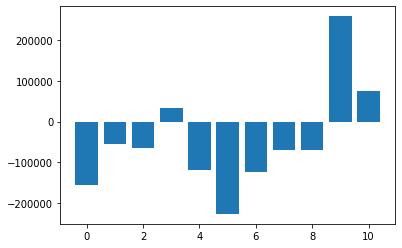

In [94]:
from matplotlib import pyplot
coefficient = model.coef_
# summarize feature coefficient
for i,v in enumerate(coefficient):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(coefficient))], coefficient)
pyplot.show()

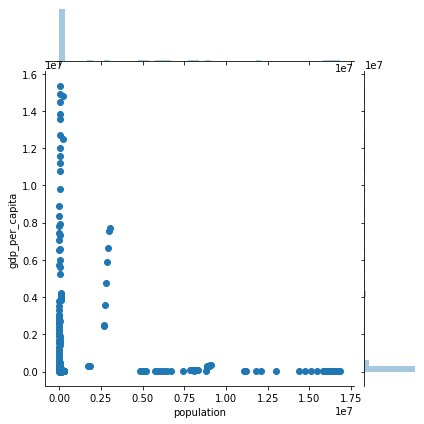

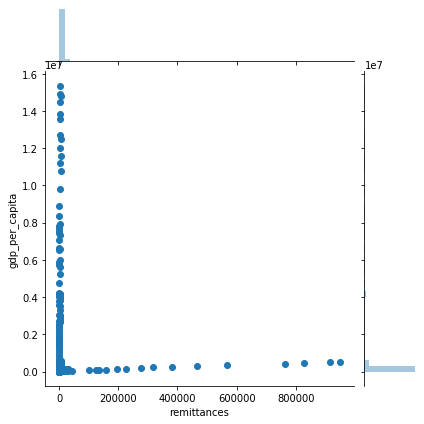

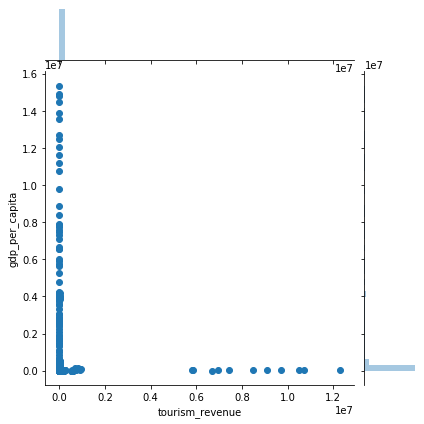

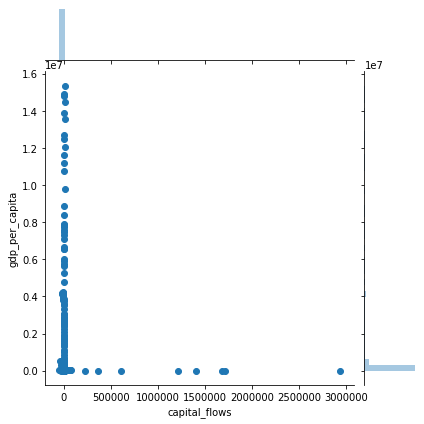

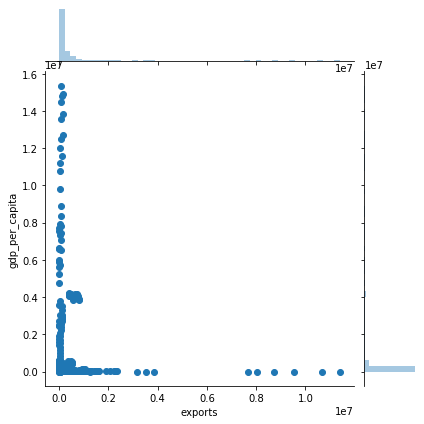

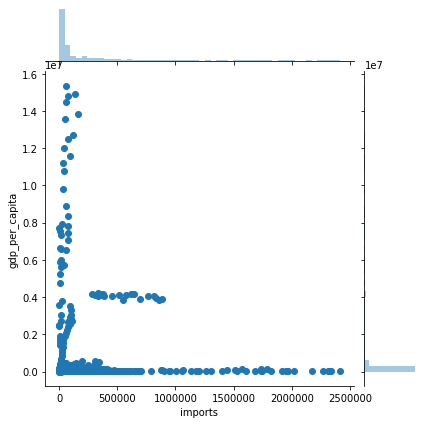

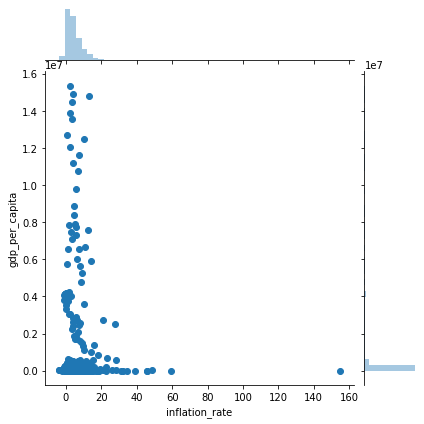

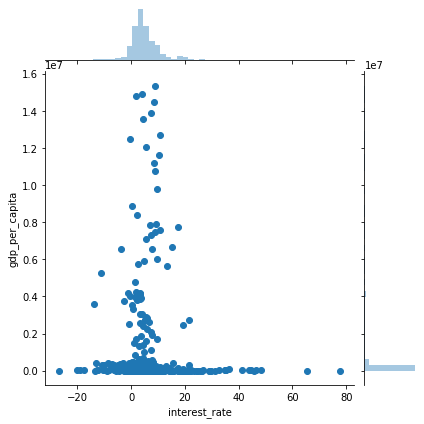

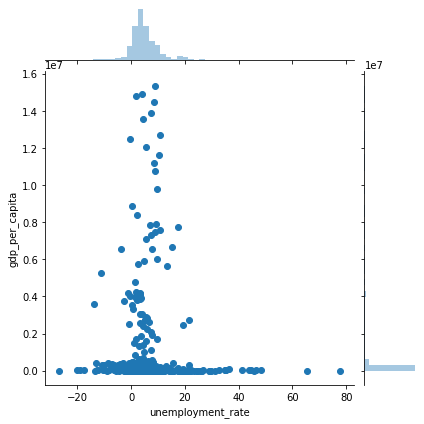

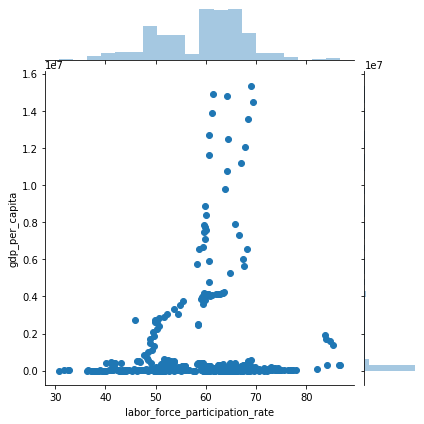

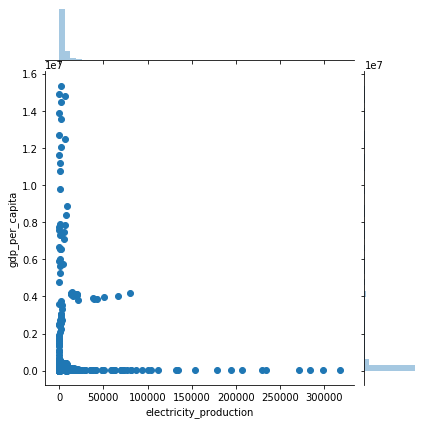

In [95]:
sns.jointplot(x=data['population'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['remittances'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['tourism_revenue'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['capital_flows'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['exports'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['imports'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['inflation_rate'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['interest_rate'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['unemployment_rate'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['labor_force_participation_rate'], y= data['gdp_per_capita'],data=data) #two ditribution
sns.jointplot(x=data['electricity_production'], y= data['gdp_per_capita'],data=data) #two ditribution
# sns.jointplot(x=data['steel_production'], y= data['gdp_per_capita'],data=data) #two ditribution
# sns.jointplot(x=data['corporate_tax_rate'], y= data['gdp_per_capita'],data=data) #two ditribution
# sns.jointplot(x=data['internet_speed'], y= data['gdp_per_capita'],data=data) #two ditribution

In [96]:
train_pred_Y = model.predict(X_train_scaled)
test_pred_Y = model.predict(X_test_scaled)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
#msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
#msle_test = mean_squared_log_error(test_pred_Y, y_test)
print('rmse_train:',rmse_train)
print('rmse_test:',rmse_test)

rmse_train: 2174282.541423555
rmse_test: 2161391.600501217


In [97]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(train_pred_Y, y_train)
r2 = r2_score(train_pred_Y, y_train)
print(mse)
print(r2)

4727504569939.273
-42.00545505830922


/Users/kevinkleyman/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.16784
Feature: 1, Score: 0.17460
Feature: 2, Score: 0.09535
Feature: 3, Score: 0.10294
Feature: 4, Score: 0.05045
Feature: 5, Score: 0.07453
Feature: 6, Score: 0.11165
Feature: 7, Score: 0.02516
Feature: 8, Score: 0.00575
Feature: 9, Score: 0.08775
Feature: 10, Score: 0.10399


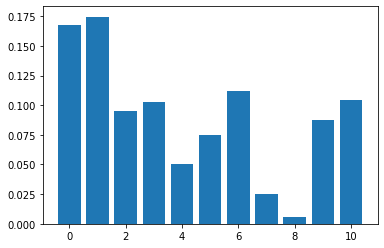

In [98]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()